In [30]:
import torch
from Define_Model.ResNet import LocalResNet
from Define_Model.Loss.SoftmaxLoss import AdditiveMarginLinear

import numpy as np
import kaldi_io
import matplotlib.pyplot as plt
import matplotlib
import pickle
import pathlib
from python_speech_features import mel2hz


%matplotlib inline
plt.rc('font', family='Times New Roman')


In [31]:
pic_f = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/vox2/klfb_egs_baseline/arcsoft_sgd_exp/inputMean_STAP_em512_wde4_var/epoch_50_var_gradient/epoch_50/time.data.pickle'

with open(pic_f, 'rb') as f:
    vt_data = pickle.load(f)
    
pic_ff = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/vox2/klfb_egs_baseline/arcsoft_sgd_exp/inputMean_STAP_em512_wde4_var/epoch_50_var_gradient/epoch_50/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    vf_data = pickle.load(f)

In [32]:
pic_f = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/cnceleb/klfb_egs12_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_60_var_gradient/epoch_60/time.data.pickle'

with open(pic_f, 'rb') as f:
    ct_data = pickle.load(f)
    
pic_ff = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/cnceleb/klfb_egs12_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_60_var_gradient/epoch_60/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    cf_data = pickle.load(f)

In [55]:
pic_f = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/cnceleb/klfb_egs_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_50_var_gradient/epoch_50/time.data.pickle'

with open(pic_f, 'rb') as f:
    c1t_data = pickle.load(f)
    
pic_ff = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/cnceleb/klfb_egs_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_50_var_gradient/epoch_50/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    c1f_data = pickle.load(f)

In [33]:
pic_f = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/epoch_50_var_gradient/epoch_50/time.data.pickle'

with open(pic_f, 'rb') as f:
    v1t_data = pickle.load(f)
    
pic_ff = '/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/vox1/klfb_egs_baseline/arcsoft/featfb40_inputMean_STAP_em512_wd5e4_var/epoch_50_var_gradient/epoch_50/freq.data.pickle'

with open(pic_ff, 'rb') as f:
    v1f_data = pickle.load(f)

In [34]:
list(f_data.keys())[:2]

['train.time.mean', 'train.time.var']

In [35]:
m = np.linspace(0, 2840.0230467083188, 40)
x = mel2hz(m)

In [40]:
np.concatenate(vt_data, axis=1).shape

(2, 4304098, 40)

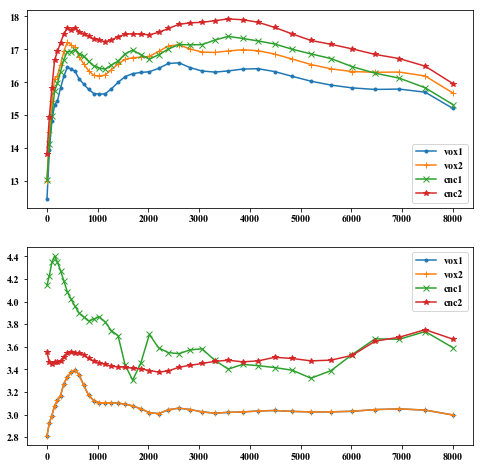

In [59]:
plt.figure(figsize=(8, 8))

vt_tm = np.concatenate(vt_data, axis=1)[0].mean(axis=0)
vt_tv = np.concatenate(vt_data, axis=1)[0].std(axis=0)

# vt_tm /= vt_tm.sum()

v1t_tm = np.concatenate(v1t_data, axis=1)[0].mean(axis=0)
v1t_tv = np.concatenate(vt_data, axis=1)[0].std(axis=0)

# v1t_tm /= v1t_tm.sum()

ct_tm = np.concatenate(ct_data, axis=1)[0].mean(axis=0)
ct_tv = np.concatenate(ct_data, axis=1)[0].std(axis=0)

c1t_tm = np.concatenate(c1t_data, axis=1)[0].mean(axis=0)
c1t_tv = np.concatenate(c1t_data, axis=1)[0].std(axis=0)


# ct_tm /= ct_tm.sum()
plt.subplot(2,1,1)

plt.plot(x, v1t_tm, marker='.')
plt.plot(x, vt_tm, marker='+')
plt.plot(x, c1t_tm, marker='x')
plt.plot(x, ct_tm, marker='*')
plt.legend(['vox1', 'vox2', 'cnc1', 'cnc2'])

plt.subplot(2,1,2)
plt.plot(x, v1t_tv, marker='.')
plt.plot(x, vt_tv, marker='+')
plt.plot(x, c1t_tv, marker='x')
plt.plot(x, ct_tv, marker='*')

plt.legend(['vox1', 'vox2', 'cnc1', 'cnc2'])

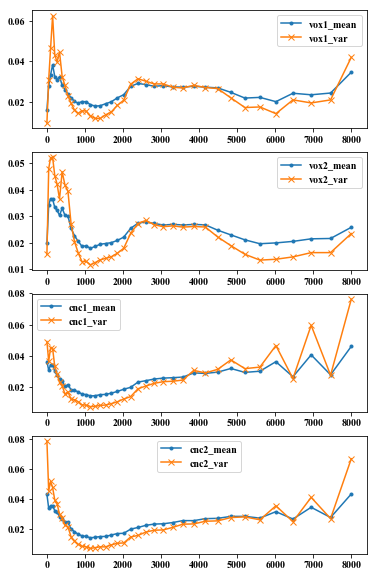

In [60]:
plt.figure(figsize=(6, 10))

vf_tm = vf_data['train.time.mean']
vf_tm /= vf_tm.sum()

vf_tv = vf_data['train.time.var']
vf_tv /= vf_tv.sum()

v1f_tm = v1f_data['train.time.mean']
v1f_tm /= v1f_tm.sum()

v1f_tv = v1f_data['train.time.var']
v1f_tv /= v1f_tv.sum()

plt.subplot(4,1,1)
plt.plot(x, v1f_tm, marker='.')
plt.plot(x, v1f_tv, marker='x')
plt.legend(['vox1_mean', 'vox1_var'])

plt.subplot(4,1,2)
plt.plot(x, vf_tm, marker='.')
plt.plot(x, vf_tv, marker='x')
plt.legend(['vox2_mean', 'vox2_var'])

cf_tm = cf_data['train.time.mean']
cf_tm /= cf_tm.sum()
cf_tv = cf_data['train.time.var']
cf_tv /= cf_tv.sum()

c1f_tm = c1f_data['train.time.mean']
c1f_tm /= c1f_tm.sum()
c1f_tv = c1f_data['train.time.var']
c1f_tv /= c1f_tv.sum()

plt.subplot(4,1,3)

plt.plot(x, c1f_tm, marker='.')
plt.plot(x, c1f_tv, marker='x')
plt.legend(['cnc1_mean', 'cnc1_var'])

plt.subplot(4,1, 4)

plt.plot(x, cf_tm, marker='.')
plt.plot(x, cf_tv, marker='x')
plt.legend(['cnc2_mean', 'cnc2_var'])


In [53]:
vf_data['train.time.mean']

array([0.00019034, 0.0003297 , 0.00035303, 0.00035056, 0.00032109,
       0.00030986, 0.00029226, 0.00031788, 0.0002923 , 0.000289  ,
       0.00024498, 0.00021814, 0.000198  , 0.00017957, 0.00018138,
       0.0001725 , 0.0001794 , 0.00018697, 0.00018979, 0.0001928 ,
       0.00020086, 0.00021303, 0.00024485, 0.00026347, 0.00026829,
       0.00026246, 0.00025707, 0.00025914, 0.00025725, 0.00025897,
       0.00025758, 0.00023811, 0.00022113, 0.00020308, 0.00018901,
       0.00019201, 0.0001975 , 0.0002068 , 0.0002081 , 0.00024858])

In [54]:
v1f_data['train.time.mean']

array([0.00011526, 0.00020538, 0.00024474, 0.00028186, 0.00023855,
       0.00022763, 0.0002383 , 0.000207  , 0.00019104, 0.00017443,
       0.00016093, 0.00014799, 0.00014126, 0.0001474 , 0.00014662,
       0.00013583, 0.00013075, 0.00013204, 0.00013925, 0.00014624,
       0.00016057, 0.00017249, 0.00020289, 0.00021363, 0.00020906,
       0.00020319, 0.00020536, 0.00020073, 0.00019998, 0.00020331,
       0.00019988, 0.00019721, 0.00018085, 0.00016006, 0.00016252,
       0.00014695, 0.00017764, 0.00017202, 0.0001784 , 0.00025446])

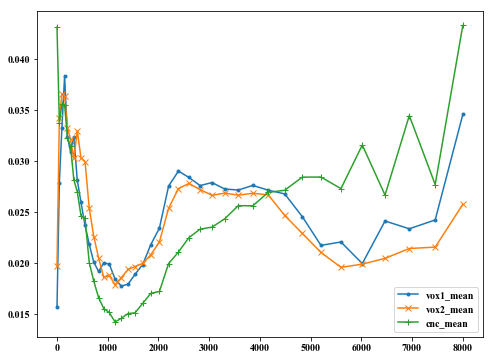

In [51]:
plt.figure(figsize=(8, 6))

plt.plot(x, v1f_tm, marker='.')
plt.plot(x, vf_tm, marker='x')
plt.plot(x, cf_tm, marker='+')

plt.legend(['vox1_mean', 'vox2_mean', 'cnc_mean'])

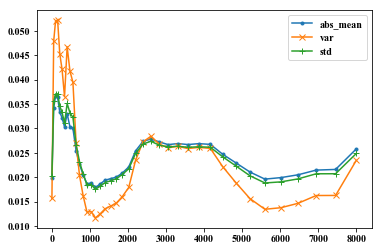

In [49]:
m = np.linspace(0, 2840.0230467083188, 40)
x = mel2hz(m)

abs_mean = f_data['train.time.mean']
var = f_data['train.time.var']

std = np.sqrt(var)

abs_mean /= abs_mean.sum()
var /= var.sum()
std /= std.sum()

plt.plot(x, abs_mean, marker='.')
plt.plot(x, var,  marker='x')
plt.plot(x, std,  marker='+')

plt.legend(['abs_mean', 'var', 'std'])

In [21]:
train_grad_all_var = np.zeros((40))
train_grad_var = []
train_grad_abs = []


dir_path = pathlib.Path('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/vox2/klfb_egs_baseline/arcsoft_sgd_exp/inputMean_STAP_em512_wde4_var/epoch_50_var_gradient/epoch_50')
train_lst = list(dir_path.glob('*train*bin'))
num_utt = 0
for t in train_lst:
    p = str(t)
    with open(p, 'rb') as f:
        sets = pickle.load(f)
        # for (data, grad, uid) in tqdm(sets):
        for (data, grad) in sets:
            train_grad_var.append(np.var(grad, axis=0))
            train_grad_abs.append(np.mean(np.abs(grad), axis=0))

            

In [24]:
train_grad_var_np = np.array(train_grad_var)
train_grad_abs_np = np.array(train_grad_abs)

train_grad_var_var = np.var(train_grad_var_np, axis=0)
train_grad_abs_var = np.var(train_grad_abs_np, axis=0)

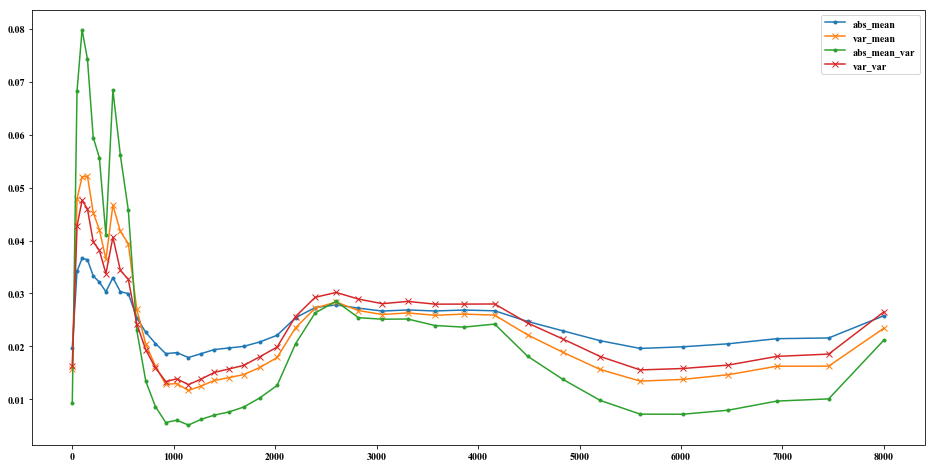

In [28]:
plt.figure(figsize=(16, 8))


train_grad_abs_var /= train_grad_abs_var.sum()
train_grad_var_var /= train_grad_var_var.sum()

plt.plot(x, abs_mean, marker='.')
plt.plot(x, var,  marker='x')

plt.plot(x, train_grad_var_var, marker='.')
plt.plot(x, train_grad_abs_var,  marker='x')

plt.legend(['abs_mean', 'var_mean', 'abs_mean_var', 'var_var'])

In [2]:
train_grad_all_var = np.zeros((40))
train_grad_var = []
train_grad_abs = []


dir_path = pathlib.Path('/home/yangwenhao/local/project/SpeakerVerification-pytorch/Data/gradient/TDNN_v5/cnceleb/klfb_egs12_baseline/arcsoft/Mean_STAP_em512_wd5e4_var/epoch_60_var_gradient/epoch_60')
train_lst = list(dir_path.glob('*train*bin'))
num_utt = 0
for t in train_lst:
    p = str(t)
    with open(p, 'rb') as f:
        sets = pickle.load(f)
        # for (data, grad, uid) in tqdm(sets):
        for (data, grad) in sets:
            train_grad_var.append(np.var(grad, axis=0))
            train_grad_abs.append(np.mean(np.abs(grad), axis=0))


In [3]:
train_grad_var_np = np.array(train_grad_var)
train_grad_abs_np = np.array(train_grad_abs)

train_grad_var_var = np.var(train_grad_var_np, axis=0)
train_grad_abs_var = np.var(train_grad_abs_np, axis=0)

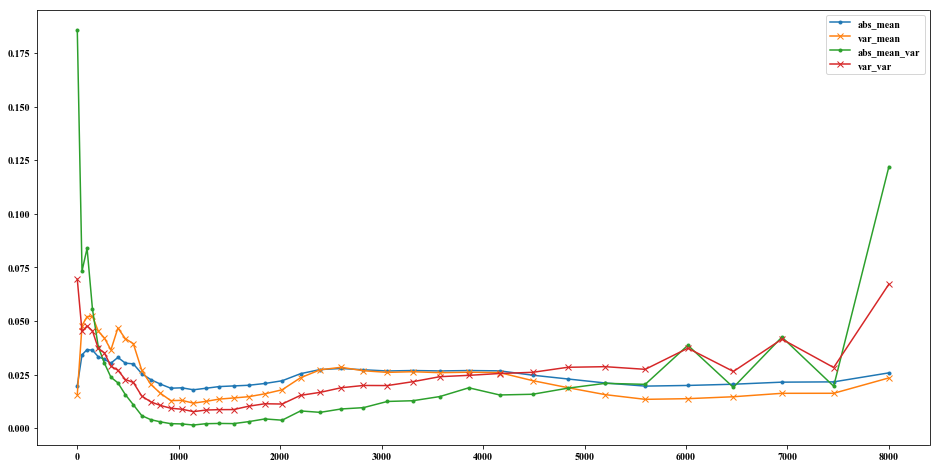

In [10]:
plt.figure(figsize=(16, 8))


train_grad_abs_var /= train_grad_abs_var.sum()
train_grad_var_var /= train_grad_var_var.sum()

plt.plot(x, abs_mean, marker='.')
plt.plot(x, var,  marker='x')

plt.plot(x, train_grad_var_var, marker='.')
plt.plot(x, train_grad_abs_var,  marker='x')

plt.legend(['abs_mean', 'var_mean', 'abs_mean_var', 'var_var'])